
<h2><center>DS-201 Final</center></h2>
<h2><center>Grace Yang</center></h2>
<h2><center>gy654, N10610063</center></h2>

## Exercise1 Instrumental variables

Patients who get surgery, for example for orthopaedic reasons, are often advised by the doctors, subsequenly to surgery, to get physitherapy, that is, a series of exercises to help rehabilitation and more complete recovery. However, the costs oof physiotherapy may often deter patients from following it. It is therefore important to try t show the potential benefits of physiootherapy, so that more patients can become convinced to follow it. 

In the period of 4 years, three cooperating hospitals randomly assigned each of the 537 eligible patietnts, who had gone through an orthopeadic operation, in one of the two groups: patients in the first group, $(Z_i = 1)$, were offered the opportunity t get physiotherapy at 50% reduced hospital fees; for patients assigned in the second group, physiotherapy was available at the standard cost. For each patient, therecorded variables, in addition to assignment $Z_i$ are: whether or not the patient got physiotherapy, $T_i^{obs} = 1$ for yes, 0 for no; an assessment of the patients recovery 3 months after surgery, $T_{i}^{obs} = 1$ for satisfactory, 0 for unsatisfactory or poor. The assessment of this studys data was done by physicians blinded to both the assignment $Z_i$ and the taking (or not) of physiotherapy by the patient. The table below gives the counts, $n_{zty}$, of patients assigned $Z_i = z$ and with physiotherapy-taking status $T_{i}^{obs} = t$ and ooutcome $Y_i^{obs} = y$

|   | Z | T_obs | Y_obs | n   |
|---|---|-------|-------|-----|
| 0 | 0 | 0     | 0     | 185 |
| 1 | 0 | 0     | 1     | 123 |
| 2 | 0 | 1     | 0     | 9   |
| 3 | 0 | 1     | 1     | 41  |
| 4 | 1 | 0     | 0     | 37  |
| 5 | 1 | 0     | 1     | 20  |
| 6 | 1 | 1     | 0     | 26  |
| 7 | 1 | 1     | 1     | 96  |

## Question1
Estimate the intention--to-treat (ITT) effect of offering the discount on the imprvement of recovery, $E[Y(Z = 1)] - E[Y(Z=0)]$, using a difference-in-means estimator. Also estimate the standard error and the asymptotic 95% confidence interval. Explain why, the ITT effect can be different from the contrast that compares outcomes $Y^{obs}$ of the patients who take vs. do not take physiotherapy.

Be aware that the input data is aggregated, so you should either used weighted estimators (for the mean and standard error). You can use Python code for computations, and in that case manually create the input dataframe from the given table.

In [28]:
import pandas as pd
import numpy as np
from scipy.stats import norm

scalar = norm.ppf(0.975)
df = pd.concat([
  pd.concat([pd.DataFrame([[0, 0, 0]])] * 185),
  pd.concat([pd.DataFrame([[0, 0, 1]])] * 123),
  pd.concat([pd.DataFrame([[0, 1, 0]])] * 9),
  pd.concat([pd.DataFrame([[0, 1, 1]])] * 41),
  pd.concat([pd.DataFrame([[1, 0, 0]])] * 37),
  pd.concat([pd.DataFrame([[1, 0, 1]])] * 20),
  pd.concat([pd.DataFrame([[1, 1, 0]])] * 26),
  pd.concat([pd.DataFrame([[1, 1, 1]])] * 96)
])

df.rename(columns = {0:'Z', 1:'T', 2:'Y'}, inplace = True)
Z_control, Z_treat = df[df['Z'] == 0], df[df['Z'] == 1]
T_control, T_treat = df[df['T'] == 0], df[df['T'] == 1]
Z_eff = np.mean(Z_treat.Y) - np.mean(Z_control.Y)
std_z = np.sqrt(np.var(Z_control.Y)/len(Z_control) + np.var(Z_treat.Y)/len(Z_treat))
T_eff = np.mean(T_treat.Y) - np.mean(T_control.Y)
std_t = np.sqrt(np.var(T_control.Y)/len(T_control) + np.var(T_treat.Y)/len(T_treat))

print(f'ITT:Effect of offering discount: {Z_eff}')
print(f'Effect of offering discount CI: [{Z_eff - scalar * std_z}, {Z_eff + scalar * std_z}]')
print(f'Effect of receiving physiotherapy: {T_eff}')
print(f'Effect of receiving physiotherapy CI: [{T_eff - scalar * std_t}, {T_eff + scalar * std_t}]')


ITT:Effect of offering discount: 0.18994413407821226
Effect of offering discount CI: [0.10300419605553315, 0.2768840721008914]
Effect of receiving physiotherapy: 0.4047308059891685
Effect of receiving physiotherapy CI: [0.3264505203039836, 0.4830110916743534]


**intention-to-treat-effect**
$E[Y(Z=1)] - E[Y(Z=0)] = 0.18994413407821226$

**physiotherapy treat effect**
$E[Y(T=1)] - E[Y(T = 0)]  = 0.4047308059891685$

The two estimated effect are different since $Z=1$(being offered fee discount) increased the chances of $T=1$(take the physiotherapy treatment), but T is not determined by Z and the compliance rate is not 100%. There are still people who are offered discount but still does not take physiotherapy. The distribution of people receiving the discount and the distribution of people receiving the actual treatment are still different, resulting in disparate effects. 

## Question2:
In plain language of this setting, and using the potential treatment notation, what are the four possible strata defined by the instrument and the treatment values?

- 1-st strata: compliers if not offered discount to physiotherapy would not take the physiotherapy treatment, if offered discount, would take physiotherapy treatment: $T(Z=0)= 0, T(Z=1) = 1$
- 2-nd strata: defiers if not offered discount to physiotherapy would take the physiotherapy treatment, if offered discount, would not take physiotherapy treatment: $T(Z=0)= 1, T(Z=1) = 0$
- 3-rd strata: always-takers who will always take the physiotherapy treatment whether or not offered discount: $T(Z=0)= 1, T(Z=1) = 1$
- 4-th strata: never-takers who will never take the physiotherapy treatment whether or not offered discount: $T(Z=0)= 0, T(Z=1) = 0$


## Quesion3:
In plain language of this setting, and in terms of potential outcomes, state the four assumptions under which the randomizer $Z_i$ is an `instrument`, and the local ATE is non-parametrically identified. Discuss their plausibility.

- assumption1: monotonicity assumption that the instrument does not dissuade to get treated. It is plausible in this case since being offered discount in physiotherapy does not dissuade people to get physiotherapy treatment. No defiers ($T(Z=0) = 1, T(Z=1) = 0$)
- assumption2: The instrument variable must not be confounded, there is no backdoor path from Z to Y. It is plausible in this case since patients are randomly assigned whether to be offered a discount, so there is no confounding variable.
- assumption3: Relavance assumption, the instrument varibale needs to have a causal effect on the treatment variable. It is plausible in this case since the discount will motivate people to receive physiotherapy treatment.
- assumption4: exclusion restriction: the causal effect of the instrument on the outcome is completely mediated by the treatment.It is plausible in this case since being offered a discount would improve patients' recovery only through the mean of encouraging patients to receive physiotherapy. 

## Question4
Which of the assumptions from the question 3 is/are enough to estimate the proportion of `never-takers`, i.e. patients who would not take physiotherapy whether or not they had been offered the discount in this study? Under this/these assumptions, report estimates of the proportions of the group defined in question2.



The monotonicity assumption is enough to estimate the proportion of never-takers, since those with $Z=0$ in the dataset can only be never-takers rather than defiers with this assumption.

In [7]:

prop_never_taker = df[(df['Z'] ==1) & (df['T']==0)].shape[0]/df[df['Z'] ==1].shape[0]
prop_always_taker = df[(df['Z']==0) & (df['T']==1)].shape[0]/df[df['Z'] ==0].shape[0]
prop_complier = 1- prop_never_taker - prop_always_taker

print(f'Proportion of complier: {prop_complier}')
print(f'Proportion of always taker: {prop_always_taker}')
print(f'Proportion of never taker: {prop_never_taker}')
print(f'Proportion of defier: {0}')

Proportion of complier: 0.5418994413407822
Proportion of always taker: 0.13966480446927373
Proportion of never taker: 0.31843575418994413
Proportion of defier: 0


## Question5
Under assumptions from question3, estimate the local ATE. In which group defined in question2 is this treatment effect estimated? You can use the python function `IV2SLS` to provide the standard error and a 95% confidence interval for your estimate.

In [10]:
! pip install linearmodels
import linearmodels as lm
from linearmodels.iv import IV2SLS

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.5 MB 8.7 MB/s 
     |████████████████████████████████| 68 kB 4.9 MB/s 


The treatment effect estimates the complier group.


the LATE equals the ITT effect divided by the share of compliers in the population.
$$ITT = E[Y|Z=1] - E[Y|Z=0]$$ 
$$\text{LATE} = \frac{ITT}{\text{proportion(complier)}} = 0.3505154639175257$$


In [18]:
no_defiers = df.copy()
no_defiers = no_defiers.assign(const = 1)

offered = no_defiers[no_defiers['Z']==1]
not_offered = no_defiers[no_defiers['Z']==0]

late = (np.mean(offered['Y']) - np.mean(not_offered['Y']))/prop_complier
late

0.3505154639175257

In [19]:
late_result = IV2SLS(dependent = no_defiers['Y'], #outcome
        endog = no_defiers['T'], #treatment
        exog = no_defiers['const'], #we just add a constant as covariate
        instruments = no_defiers['Z'] #Instrument
        ).fit(cov_type = "unadjusted")
late_result.summary

<class 'linearmodels.compat.statsmodels.Summary'>
"""
                          IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:                      Y   R-squared:                      0.1403
Estimator:                    IV-2SLS   Adj. R-squared:                 0.1387
No. Observations:                 537   F-statistic:                    20.070
Date:                Sun, Dec 11 2022   P-value (F-stat)                0.0000
Time:                        22:45:17   Distribution:                  chi2(1)
Cov. Estimator:            unadjusted                                         
                                                                              
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
const          0.4091     0.0321     12.764     0.0000      0.3463      0.4720
T              0.3505     0.0782     4.4800     0.0000      0.1972      0.5039
==============================================================================

Endogenous: T
Instruments: Z
Unadjusted Covariance (Homoskedastic)
Debiased: False
"""

In [20]:

std = late_result.std_errors[1]
late_ci = [late - scalar * std , late + scalar * std]
print(f'The late estimate of physiotherapy treatment is: {late}')
print(f'The standard error of physiotherapy treatment is: {std}')
print(f'The 95% confidence interval is: {late_ci}')


The late estimate of physiotherapy treatment is: 0.3505154639175257
The standard error of physiotherapy treatment is: 0.07824086186241694
The 95% confidence interval is: [0.19716619254781503, 0.5038647352872363]


## Question6
Discuss briefly (i) the clinical and (ii) the health policy implications of the difference between your estimates in question 5 vs. question1. 

**result of Q1**: 

- Effect of receiving physiotherapy: 0.4047308059891685
- The 95% confidence interval is: [0.3264505203039836, 0.4830110916743534]

**result of Q5**:

- The late estimate of physiotherapy treatment is: 0.35051546391752675
- The 95% confidence interval is: [0.1971661925478161, 0.5038647352872374]


The effect estimate in question 1 is 0.05 higher than the effect estimate in question 5, and the estimator in question 5 has a wider confidence interval compared with the estmate obtained in question 1. 

- Clinical implications: The use of estimator in question 5 would lower people's conviction that the physiotherapy treatment is beneficial in terms of suigical recovery. Fewer patients would become convinced to follow the treatment compared to the case when using estimator in question 1. If the physiotherapy is trully beneficial, some patients, not persuaded by the effect of  physiotherapy treatment, would not enjoy those benefits. 

- Health policy implications:
If the physiotherapy is trully beneficial and health institutions would like to promote it to the public, using the estimate obtained in question 1 would better achieve this purpose since it concludes with a more significant effect on surgery recovery with higher confidence. This result from question1 would encourage more patients to choose physiotherapy, making the promoting policy easier to implement. 

## Exercise2: Regression Discontinuity Design

In this problem you will be analyzing a dataset from a 2011 paper by Carpenter and Dobkin. 
This paper examines evidence linking the legal alcohol drinking age in the US(21) to increased likelihood of accidents, hospitalization, and health hazards in general. The main identification strategy employed by the authors is a sharp Regression Discontinuity Design(RDD), where age is the running variable, and 21 is the cutoff. 
The dataset contains 80 observations, where each unit is an age group, and values are collected over 4 US states. 
The dataset is `ER.csv` and it contains five variables: 
- age – The age of the unit, where the decimal indicates month of the year
- all – The total number of ER admissions
- injury – The total number of ER admissions due to injury
- illness – The total number of ER admissions due to viral illness
- alcohol – An adjusted index of how many ER admissions were linked to alcohol consumption




## Question1:
Preprocess the data by creating a centralized version of the running variable, and a binary variable indicating the treatment.

In [6]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.filterwarnings("ignore")
import statsmodels.formula.api as smf

file_path = 'drive/MyDrive/Colab Notebooks/causal inference/final/ER.csv'
er = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
running_variables = ['age']
outcomes = ['all', 'injury', 'illness', 'alcohol']
processed = er.copy()
processed['age'] = er['age'] - 21
processed['age_binary'] = np.where(processed['age'] >= 0, 1, 0)
processed['original_age'] = er['age']
processed[outcomes] = er[outcomes]
processed

,alcohol,all,injury,illness,age,age_binary,original_age
0,42.804927,3496.384281,1321.324173,2134.895744,-3.333333,0,17.666667
1,43.152370,3456.984291,1293.737231,2122.665765,-3.250000,0,17.750000
2,42.665950,3466.017798,1284.842701,2140.871757,-3.166667,0,17.833333
3,47.599635,3492.631901,1268.860342,2180.132769,-3.083333,0,17.916667
4,55.729792,3602.284782,1257.047294,2293.746497,-3.000000,0,18.000000
...,...,...,...,...,...,...,...
75,61.497339,4217.049703,1102.852272,3057.633777,2.916667,1,23.916667
76,70.322380,4268.679672,1121.058264,3082.788621,3.000000,1,24.000000
77,62.956597,4235.255695,1096.667794,3079.939591,3.083333,1,24.083333
78,61.636316,4236.020068,1091.178201,3088.208725,3.166667,1,24.166667


## Question2
Estimate the effect of being legally able to purchase alcohol (age $\geq 21$) on the `all`, `injury`, and `alcohol` variables using an RDD with bandwidth = 1. For each of the three outcomes report point estimates and 95% confidence intervals. Repeat the analysis for bandwidth = 0.5 years, and bandwidth = 2 years. Discuss and interpret your results. Which outcome variable seems to be associated with the largest effect? Does bandwidth selection influence results? You can use the model `wls` from package `statsmodels.formula.api`, as in the recitation. 

In [21]:
import matplotlib.pyplot as plt

def local_linear_estimator(df, bandwidth, variables, plot = False):
  print(f'---------bandwidth = {bandwidth} year(s)----------------')
  df_close = df[abs(df['age']) <= 0.5 * bandwidth]
  res = {}
  for v in variables:
    model = smf.wls(f"{v}~age_binary", df_close)
    model_fit = model.fit()

    if(plot):
      model1 = smf.wls(f"{v}~age", df_close[df_close['age_binary']==0])
      model_fit1 = model1.fit()
      model2 = smf.wls(f"{v}~age", df_close[df_close['age_binary']==1])
      model_fit2 = model2.fit()

      plt.scatter(x = df['age'], y= df[v], color = "red", s =10)
      x1 = df[df['age_binary'] ==0]
      x2 = df[df['age_binary'] ==1]
      y1= model_fit1.predict(x1)
      y2= model_fit2.predict(x2)

      plt.plot(x1.age, y1, linewidth = 5)
      plt.plot(x2.age, y2, linewidth = 5)
      plt.vlines(x = -0.5 * bandwidth, ymin = min(df[v])-1, ymax = max(df[v])+1, color = "b", linestyles = 'dashed')
      plt.vlines(x = 0.5* bandwidth, ymin = min(df[v])-1, ymax = max(df[v])+1, color = "b", linestyles = 'dashed')
      plt.title(f'RDD of {v}')
      plt.xlabel('age')
      plt.ylabel(v)
      plt.show()


    coeff = model_fit.params['age_binary']
    ci_low = model_fit.conf_int()[0]['age_binary']
    ci_high = model_fit.conf_int()[1]['age_binary']
    ci = [ci_low, ci_high]
    res[v] = [coeff, ci]
  ret = pd.DataFrame.from_dict(res).transpose()
  ret.rename(columns = {0:'late', 1:'CI'}, inplace = True)
  return ret
variables = ['all', 'injury', 'alcohol']
local_linear_estimator(processed, 1, variables)

---------bandwidth = 1 year(s)----------------


,late,CI
all,79.069661,"[46.06574673309291, 112.07357576047326]"
injury,25.494014,"[8.495797480276629, 42.49222997893843]"
alcohol,26.637265,"[8.738914590906603, 44.53561601415313]"


In [22]:
local_linear_estimator(processed, 0.5, variables)

---------bandwidth = 0.5 year(s)----------------


,late,CI
all,80.884635,"[25.5371016495165, 136.23216867472087]"
injury,29.752667,"[2.885209836678616, 56.62012456522932]"
alcohol,31.611485,"[-7.59727738588748, 70.82024751045725]"


In [23]:
local_linear_estimator(processed, 2, variables)

---------bandwidth = 2 year(s)----------------


,late,CI
all,80.189305,"[59.22786045309181, 101.15074862909444]"
injury,12.915956,"[1.7193036320130783, 24.112607562374635]"
alcohol,21.124064,"[11.561147074534, 30.686981100779448]"


The `all` variable seems to be associated with the largest effect, since its late estimate is larger compared with `injury` and `alcohol` for all bandwidth chosen. 

As bandwidth increase from 0.5 year to 2 years, the estimated effect on number of admissions related to `all` fluctuates from 80 to 79 to 80. The estimated effect on number of admissions related to `injury` decreases from positive 30 to 25 to 13. The estimated effect on number of admissions related to `alcohol` decreases from 31 to 26 to 21. For all of the three variables, the effect is in positive direction and the confidence interval of late gets narrower as bandwidth increases. With a larger bandwidth, we get a robust model in estimating the effect of being legal to purchase alcohol on the number of hospital admissions related to alcohol, but the difference at the cut-off point may not reflect the local behavior around the discontinuity point, and bias the estimate. 

## Question3:
Using the entire dataset (no need to aggregate), create and show RDD plots that visualize the discontinuity for each of the three outcome variables used in Question 1. The plots should display observed points, regression lines, and vertical lines to indicate the bandwidth. 

---------bandwidth = 1 year(s)----------------


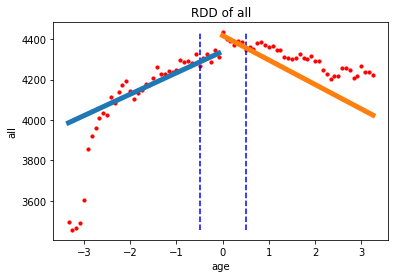

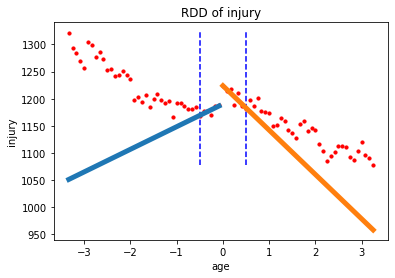

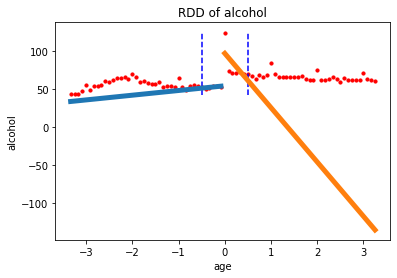

In [24]:
res = local_linear_estimator(processed, 1, variables, plot = True)

---------bandwidth = 0.5 year(s)----------------


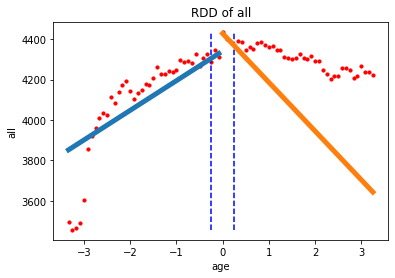

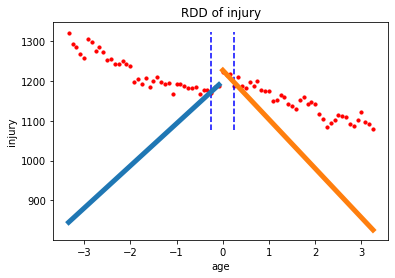

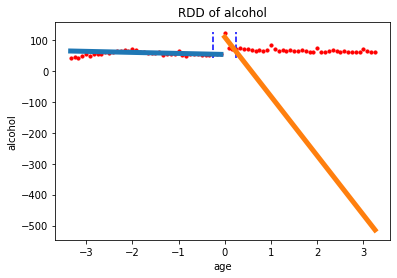

In [25]:
res = local_linear_estimator(processed, 0.5, variables, plot = True)

---------bandwidth = 2 year(s)----------------


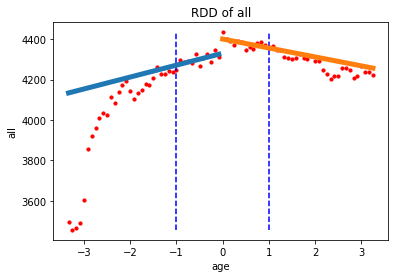

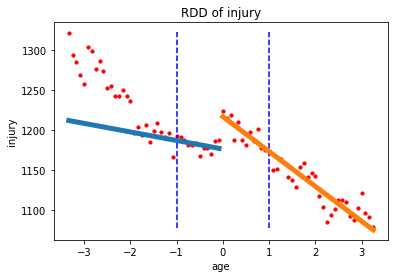

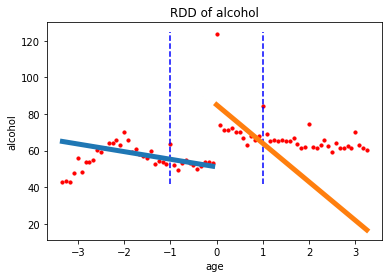

In [26]:
res = local_linear_estimator(processed, 2, variables, plot = True)

## Question4:
Conduct a placebo RDD analysis using the `illness` variable as outcome: since viral illnesses are not caused by alcohol consumption, we have no reason to expect that being legally able to drink will have an effect on this variable. Report both RDD estimates and 95% CIs, and make a RDD plot for this outcome variable. Is there a treatment effect and is it statistically significant? What does this suggest about the plausibility of the RDD assumptions?

---------bandwidth = 0.5 year(s)----------------


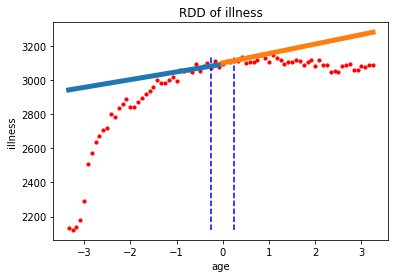

,late,CI
illness,21.500906,"[-11.097027644895036, 54.09883897893434]"


In [29]:
local_linear_estimator(processed,0.5 , ['illness'], plot = True)

To examine the RDD assumption, we need to check if there is a significant difference in viral illnesses admission when age is just below 21 and just above 21. If using a bandwidth of 0.5 years, there is a positive treatment effect of 21.5, but we cannot conclude that it is statistically significant as 0 is contained in its confidence interval. In this case, the RDD assumption is plausible, as the assumption requires no significant differences in outcome (`illness` in this case) between both sides of the cut-off. 

However, note that if using a bandwidth of 1 year, there is a significant treatment effect since 0 is now not contained in the confidence interval. In this case the RDD assumption is violated. 

In general, whether the RDD assumption is plausible depends on the bandwidth chosen, the smaller the bandwidth, the higher the variance and lower the bias. Only when the confidence interval contains 0 with the bandwidth chosen, we can say the RDD is plausible. 

---------bandwidth = 1 year(s)----------------


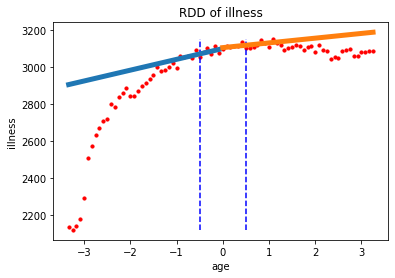

,late,CI
illness,28.407568,"[7.621335159322303, 49.1938008958809]"


In [30]:
local_linear_estimator(processed,1 , ['illness'], plot = True)